# Desafio - Dia 01:

**1**: Proporção dos inscritos por idade.

**2**: Descobrir de quais estados são os inscritos com 13 anos.

**3**: Adicionar título no gráfico.

**4**: Plotar os histogramas das idades do treineiro e não treineiros.

**5**: Comparar as distribuições das provas em inglês e espanhol.

**6**: Explorar a documentação e visualizações com matplotlib ou pandas e gerar novas visualizações.

### Importando pacotes e base de dados:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


### 1 - Proporção dos inscritos por idade:

In [2]:
idade_normalizada = dados['NU_IDADE'].value_counts(normalize=True).sort_index()*100
idade_normalizada = pd.DataFrame({'Proporção (%)': idade_normalizada})
idade_normalizada.rename_axis('Idade', inplace=True)
idade_normalizada

,Proporção (%)
Idade,
13,0.003140
14,0.110692
15,1.577171
16,6.146962
17,16.687078
...,...
73,0.001570
75,0.001570
76,0.000785


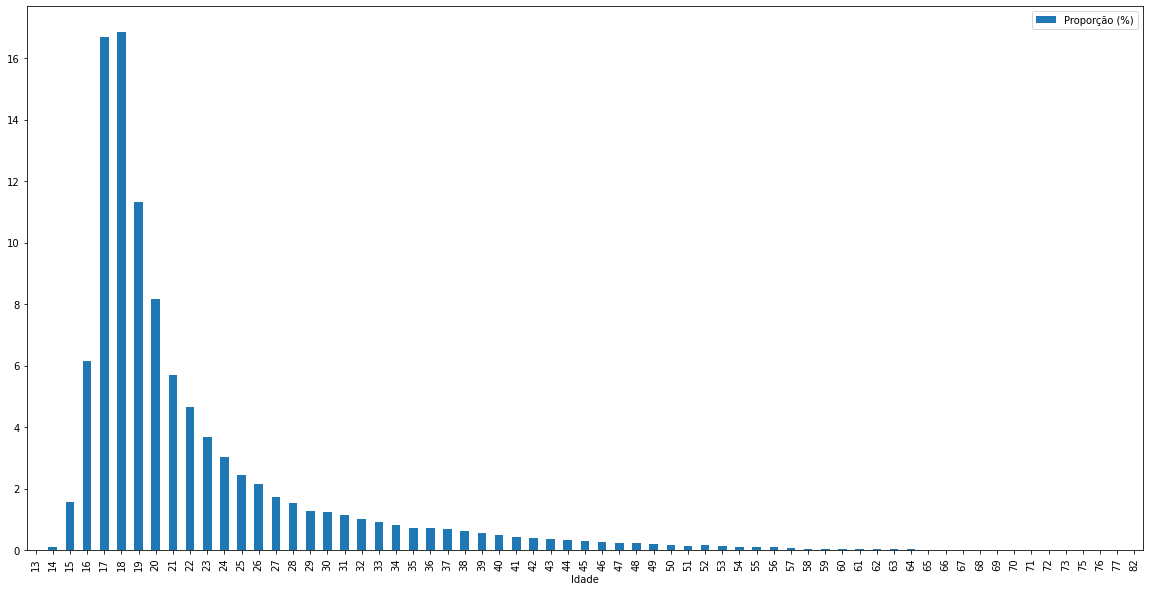

In [3]:
idade_normalizada.plot.bar(y='Proporção (%)', figsize=(20,10))

In [4]:
idade_normalizada.loc[17][0].round(2)

16.69

In [5]:
idade_normalizada.loc[18][0].round(2)

16.84

In [6]:
idade_normalizada.loc[19][0].round(2)

11.32

In [7]:
grupo_181719 = (idade_normalizada.loc[17][0]+idade_normalizada.loc[18][0]+idade_normalizada.loc[19][0]).round(2)
grupo_181719

44.85

Os candidatos com 18, 17 e 19 anos representam, respectivamente, 16,84%, 16,68% e 11,31% da amostra selecionada. Esse grupo representa em conjunto 44,85% da amostra.

### 2 - Descobrir de quais estados são os inscritos com 13 anos:

In [8]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

Os inscritos com 13 anos nessa amostra são de Amapá, Bahia, Mato Grosso e São Paulo.

### 3 - Adicionar título aos gráficos:

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra')

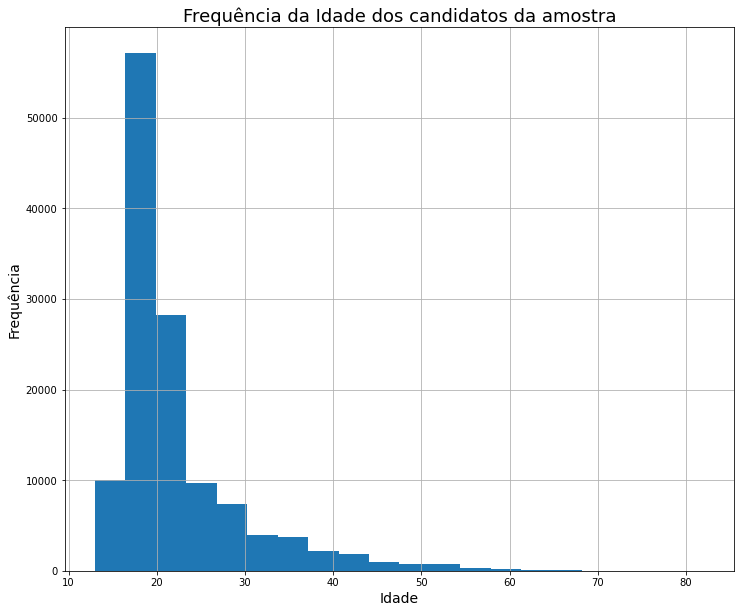

In [12]:
dados["NU_IDADE"].hist(bins=20, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Distribuição das notas dos candidatos da amostra')

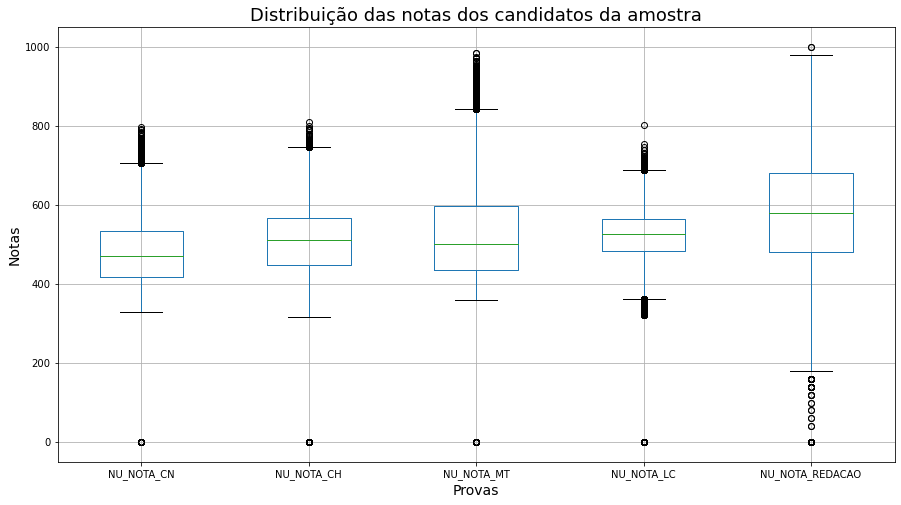

In [14]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados[provas].plot.box(grid=True, figsize=(15,8)) 
plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos da amostra', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Proporção das notas dos candidatos da amostra conforme idade')

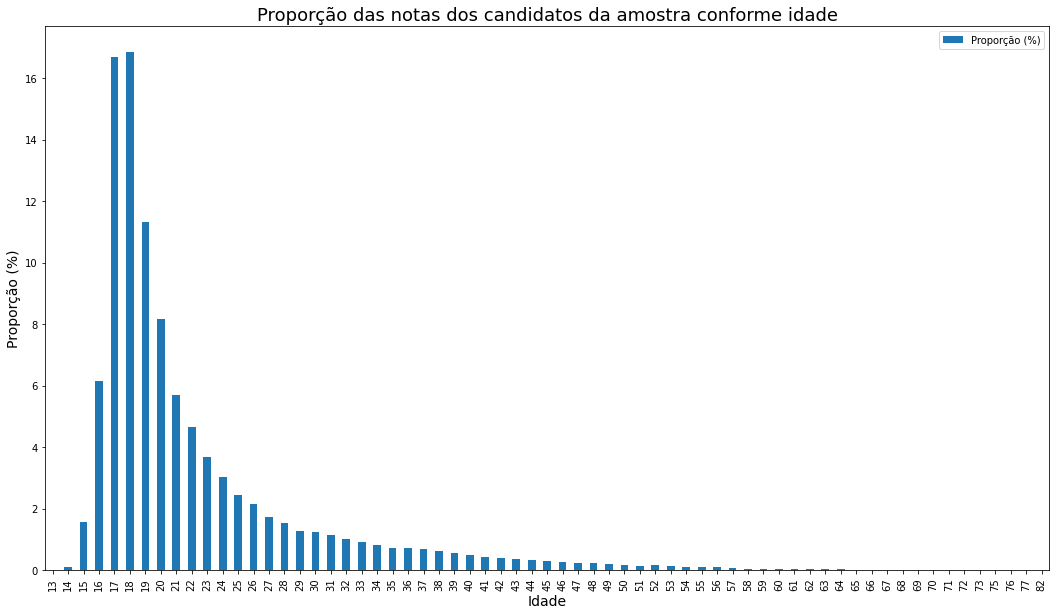

In [15]:
idade_normalizada.plot.bar(y='Proporção (%)', figsize=(18,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Proporção (%)', fontdict={'fontsize':14})
plt.title('Proporção das notas dos candidatos da amostra conforme idade', fontdict={'fontsize':18})

### 4 - Plotar os histogramas das idades do treineiro e não treineiros:

In [26]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra - Treineiros')

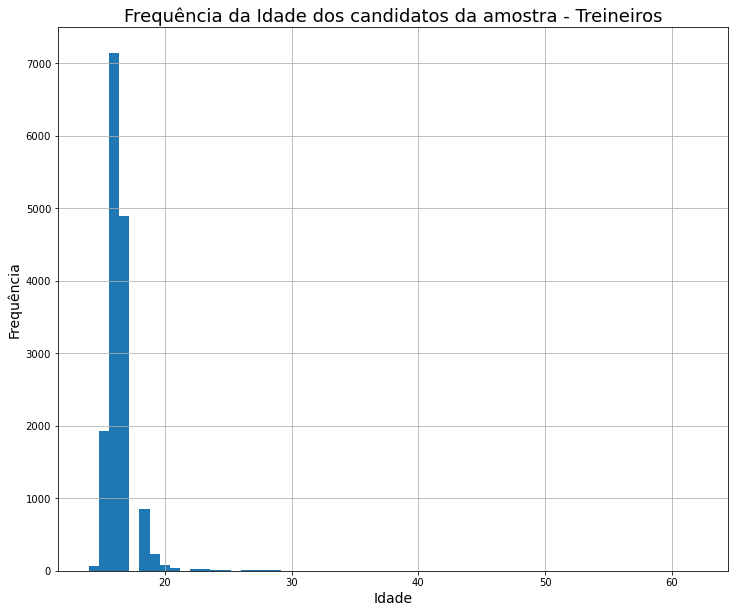

In [24]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins=60, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra - Treineiros', fontdict={'fontsize':18})

In [27]:
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].value_counts().sort_index()

13        4
14       77
15       82
16      688
17    16355
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Text(0.5, 1.0, 'Frequência da Idade dos candidatos da amostra - Não Treineiros')

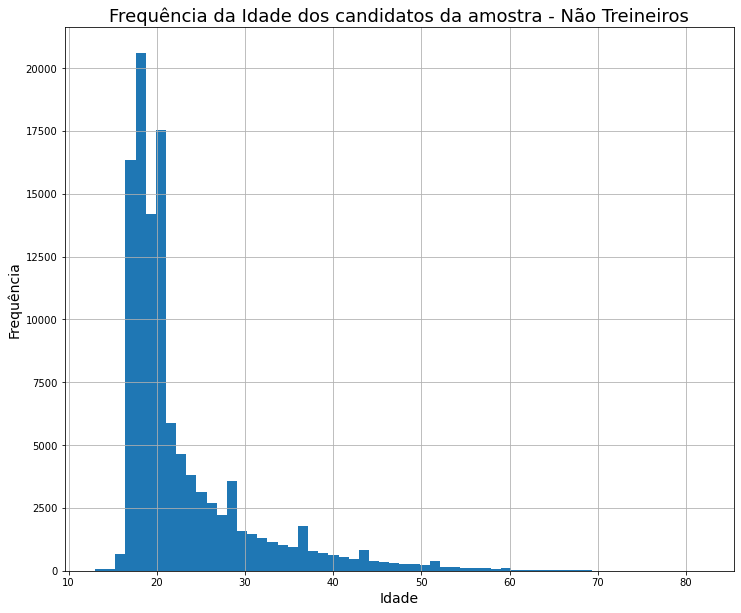

In [25]:
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].hist(bins=60, figsize=(12,10))
plt.xlabel('Idade', fontdict={'fontsize':14})
plt.ylabel('Frequência', fontdict={'fontsize':14})
plt.title('Frequência da Idade dos candidatos da amostra - Não Treineiros', fontdict={'fontsize':18})

As idades dos candidatos treineiros mais frequentes nessa amostra estão entre 15 e 17 anos. Quanto à candidatos não treineiros, as idades mais frequentes nessa amostra estão entre 17 e 21 anos.

### 5 - Comparar as distribuições das provas em inglês e espanhol:

Text(0.5, 1.0, 'Distribuição das notas dos candidatos que escolheram fazer a prova de inglês')

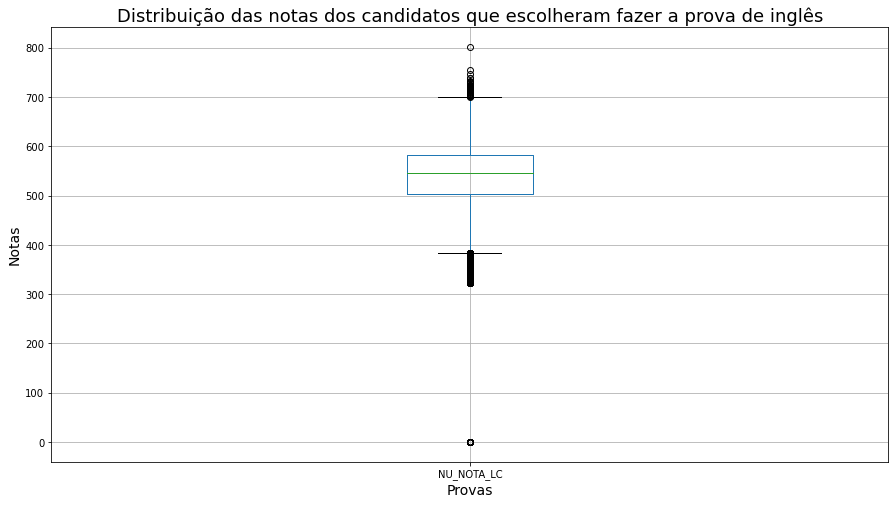

In [30]:
dados.query("TP_LINGUA == 0")['NU_NOTA_LC'].plot.box(grid=True, figsize=(15,8))

plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos que escolheram fazer a prova de inglês', fontdict={'fontsize':18})

Text(0.5, 1.0, 'Distribuição das notas dos candidatos que escolheram fazer a prova de espanhol')

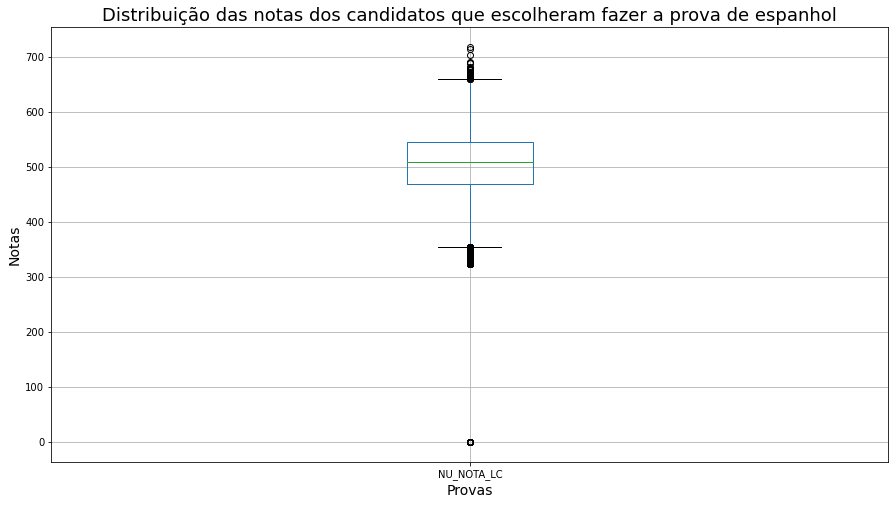

In [31]:
dados.query("TP_LINGUA == 1")['NU_NOTA_LC'].plot.box(grid=True, figsize=(15,8))

plt.xlabel('Provas', fontdict={'fontsize':14})
plt.ylabel('Notas', fontdict={'fontsize':14})
plt.title('Distribuição das notas dos candidatos que escolheram fazer a prova de espanhol', fontdict={'fontsize':18})

Segundo os gráficos que mostram as distribuições das notas, os candidatos que escolheram a prova de inglês acertaram mais questões do que os alunos que escolheram a prova de espanhol.

### 6 - Explorar a documentação e visualizações com matplotlib ou pandas e gerar novas visualizações.

Nesse tópico decidi refazer o gráfico de proporção de alunos por idade. No ponto 1, fiz um gráfico de barras. Agora a ideia seria fazer um gráfico de pizza (pie chart).

In [45]:
idade_normalizada['Proporção (%)']

Idade
13     0.003140
14     0.110692
15     1.577171
16     6.146962
17    16.687078
        ...    
73     0.001570
75     0.001570
76     0.000785
77     0.000785
82     0.000785
Name: Proporção (%), Length: 65, dtype: float64

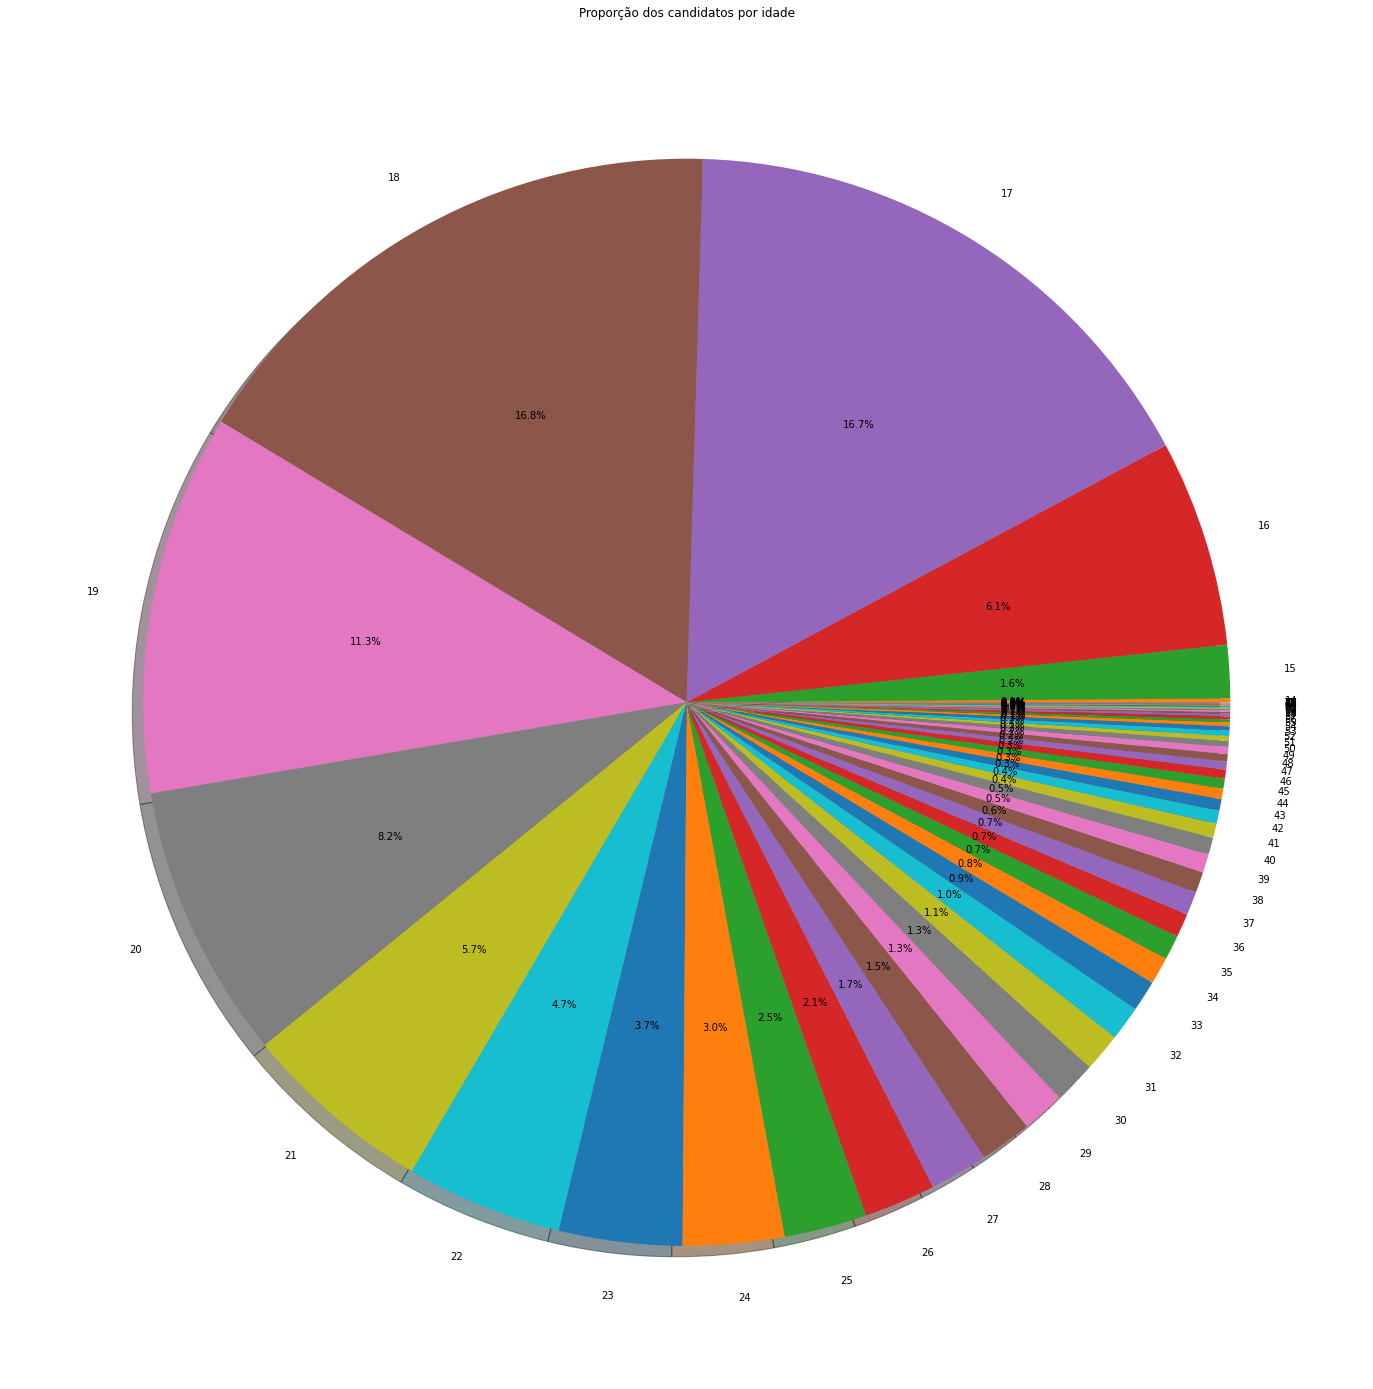

In [72]:
labels = idade_normalizada.index
sizes = idade_normalizada['Proporção (%)']

fig1, ax1 = plt.subplots(figsize=(25, 25))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, )
ax1.set_title("Proporção dos candidatos por idade")

plt.show()